In [6]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install opencv-python --user

!{sys.executable} -m pip install -U setuptools --user

  Using cached https://files.pythonhosted.org/packages/3d/72/1c1498c1e908e0562b1e1cd30012580baa7d33b5b0ffdbeb5fde2462cc71/setuptools-45.2.0-py3-none-any.whl


In [1]:
import copy
import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Lambda, Input, Permute, Multiply, Dot, Activation, Concatenate, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as Image
from keras import backend as K
from matplotlib import pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 50
img_rows, img_cols, img_chls = 32, 32, 3

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_chls)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_chls)
input_shape = (img_rows, img_cols, img_chls)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [8]:
from .. import residual_blocks, residual_models

ImportError: attempted relative import with no known parent package

In [7]:
model = load_model("attention_cifar10.h5")
mask_model = load_model("attention_cifar10_mask.h5")

ValueError: bad marshal data (unknown type code)

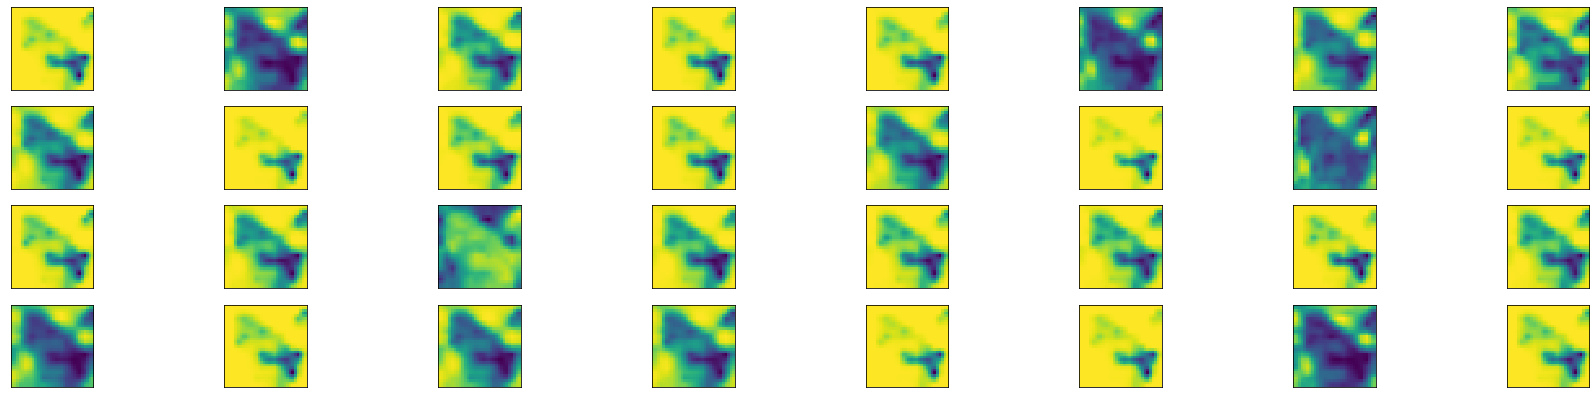

In [71]:
to_show = mask_model.predict(x_test[30:40])
to_show = [cv2.resize(im, (32, 32)) for im in to_show]
to_show = [im/np.sum(im) for im in to_show]
fig = plt.figure(figsize=(30, 7))
for i in range(32):
    ax = fig.add_subplot(4, 8, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(to_show[0].T[i].reshape(32, 32).T, cmap="viridis")

<Figure size 2160x504 with 0 Axes>

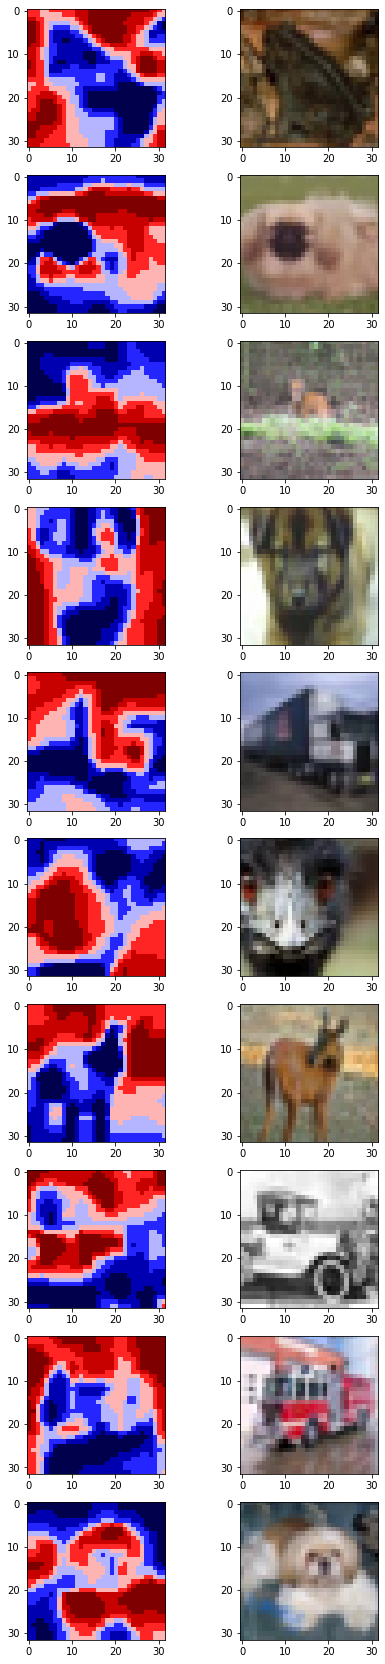

In [74]:
fig = plt.figure(figsize=(30, 7))
from itertools import combinations 
def rSubset(arr, r): 
  
    # return list of all subsets of length r 
    # to deal with duplicate subsets use  
    # set(list(combinations(arr, r))) 
    return list(combinations(arr, r)) 

max_index = 0
max_score = 0
fig = plt.figure(figsize=(7, 30))

for j in range(10):
    ax = fig.add_subplot(10, 2, 2*j + 1)
    max_index = -1
    max_score = -1
        
#     for index, i in enumerate(rSubset(range(32), 5)):
#         mask = [a in i for a in range(32)]
#         score = np.sum(np.max(to_show[j].T[mask], axis=0).T)
#         if score > max_score:
#             max_index = index
#             max_score = score

#     mask = [a in rSubset(range(32), 5)[max_index] for a in range(32)]
#     ax.imshow(np.argmax(to_show[j].T[mask], axis=0).T, cmap='tab20')
    ar = np.sum(to_show[j].T, axis=0).T.reshape(32*32)
    srt = np.argsort(ar)
    rank = np.argsort(srt)
    partition = np.array([a//128 for a in rank])
    
#     ax.imshow(np.sum(to_show[j].T, axis=0).T, cmap='viridis')
    ax.imshow(partition.reshape((32, 32)), cmap='seismic')
    ax = fig.add_subplot(10, 2, 2*j + 2)
    
    ax.imshow(x_test[30+j])

#     print(max_score)